In [0]:
## setup for google colab
## run this cell only when using google colab
!pip3 install termcolor
from termcolor import colored

## print command in different color
def print_terminal_command(command) :
  print(colored('@ ' + command, 'green'))


print_terminal_command('git clone https://github.com/bmy4415/deeplearning_study.git')
!git clone https://github.com/bmy4415/deeplearning_study.git
print_terminal_command('cp -r deeplearning_study/practice/all .')
!cp -r deeplearning_study/practice/all .
print_terminal_command('rm -rf deeplearning_study')
!rm -rf deeplearning_study
print_terminal_command('ls -al')
!ls -al

print_terminal_command('ls -al all')
!ls -al all

@ git clone https://github.com/bmy4415/deeplearning_study.git
Cloning into 'deeplearning_study'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 185 (delta 30), reused 47 (delta 15), pack-reused 119
Receiving objects: 100% (185/185), 111.12 MiB | 36.69 MiB/s, done.
Resolving deltas: 100% (50/50), done.
@ cp -r deeplearning_study/practice/all .
@ rm -rf deeplearning_study
@ ls -al
total 20
drwxr-xr-x 1 root root 4096 Dec 18 05:17 .
drwxr-xr-x 1 root root 4096 Dec 18 04:28 ..
drwxr-xr-x 2 root root 4096 Dec 18 04:47 all
drwxr-xr-x 1 root root 4096 Dec 10 17:34 .config
drwxr-xr-x 1 root root 4096 Dec 10 17:34 sample_data
@ ls -al all
total 15052
drwxr-xr-x 2 root root     4096 Dec 18 04:47 .
drwxr-xr-x 1 root root     4096 Dec 18 05:17 ..
-rwxr-xr-x 1 root root   137045 Dec 18 05:17 sample_submission.csv
-rwxr-xr-x 1 root root  2844086 Dec 18 05:17 test.json
-rwxr-xr-x 1 root root 1241506

In [0]:
# load data
import random
import json
from functools import reduce
with open('./all/train.json') as file:
    kaggle_train_data = json.load(file)
with open('./all/test.json') as file:
    kaggle_test_data = json.load(file)

In [0]:
print('kaggle_train_data: ', len(kaggle_train_data))
print(kaggle_train_data[0])
print('kaggle_test_data: ', len(kaggle_test_data))
print(kaggle_test_data[0])

kaggle_train_data:  39774
{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}
kaggle_test_data:  9944
{'id': 18009, 'ingredients': ['baking powder', 'eggs', 'all-purpose flour', 'raisins', 'milk', 'white sugar']}


In [0]:
# collect ingredients ans cuisnes
unique_ingredients = set()
unique_cuisines = set()

for item in kaggle_train_data:
    ingredients = item['ingredients']
    cuisine = item['cuisine']
    unique_ingredients.update(ingredients)
    unique_cuisines.add(cuisine)

num_ingredients = len(unique_ingredients)
num_cuisines = len(unique_cuisines)
ingredients_per_cuisine = sum(map(lambda x: len(x['ingredients']), kaggle_train_data)) / len(kaggle_train_data)

unique_ingredients = list(unique_ingredients)
unique_cuisines = list(unique_cuisines)

print('number of unique ingredients:', num_ingredients)
print('number of unique cuisines:', num_cuisines)
print('average number of ingredients per cuisine:', round(ingredients_per_cuisine, 2))
print('if we convert input ingredients to 1d-array of size 6714, it will be very sparse')

number of unique ingredients: 6714
number of unique cuisines: 20
average number of ingredients per cuisine: 10.77
if we convert input ingredients to 1d-array of size 6714, it will be very sparse


In [0]:
# cuisines in train data and test data
ingredients_in_kaggle_train_data = set()
ingredients_not_in_kaggle_train_data = set()
for item in kaggle_test_data:
    ingredients = item['ingredients']
    for ingredi in ingredients:
        if ingredi not in unique_ingredients:
            ingredients_not_in_kaggle_train_data.add(ingredi)
        else:
            ingredients_in_kaggle_train_data.add(ingredi)
            
print('number of ingredients already existing in kaggle_train_data:', len(ingredients_in_kaggle_train_data))
print('number of ingredients not existing in kaggle_train_data:', len(ingredients_not_in_kaggle_train_data))

number of ingredients already existing in kaggle_train_data: 4061
number of ingredients not existing in kaggle_train_data: 423


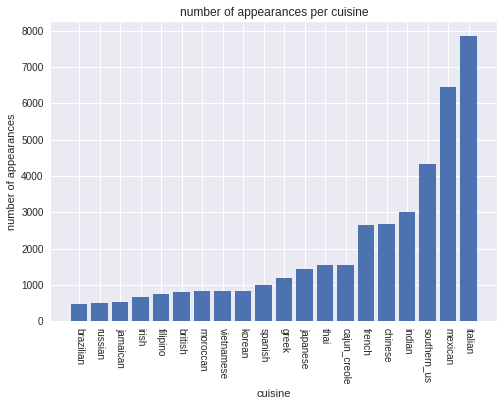

In [0]:
# distribution of cuisines
from matplotlib import pyplot as plt

cuisine_appearance_dict = dict()
for item in kaggle_train_data:
    cuisine = item['cuisine']
    if cuisine in cuisine_appearance_dict:
        cuisine_appearance_dict[cuisine] += 1
    else:
        cuisine_appearance_dict[cuisine] = 1
        
cuisine_appearance_list = []
for cuisine in cuisine_appearance_dict:
    cuisine_appearance_list.append((cuisine, cuisine_appearance_dict[cuisine]))

cuisine_appearance_list.sort(key=lambda x: x[1])
x = [item[0] for item in cuisine_appearance_list] # cuisine
y = [item[1] for item in cuisine_appearance_list] # number of appearances

x_pos = range(len(x))
plt.bar(x_pos, y)
plt.xlabel('cuisine')
plt.ylabel('number of appearances')
plt.title('number of appearances per cuisine')
plt.xticks(x_pos, x, rotation=270)
plt.show()

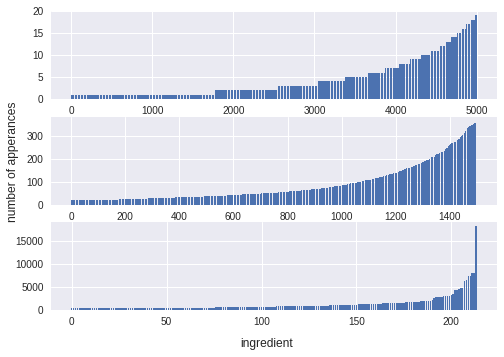

In [0]:
# ingredients distribution
ingredients_appearance_dict = dict()
for item in kaggle_train_data:
    ingredients = item['ingredients']
    for ingredi in ingredients:
        if ingredi in ingredients_appearance_dict:
            ingredients_appearance_dict[ingredi] += 1
        else:
            ingredients_appearance_dict[ingredi] = 1
            
ingredients_appearance_list = []
for ingredi in ingredients_appearance_dict:
    ingredients_appearance_list.append((ingredi, ingredients_appearance_dict[ingredi]))

ingredients_appearance_list.sort(key=lambda x: x[1])
x = [item[0] for item in ingredients_appearance_list] # ingredient
y = [item[1] for item in ingredients_appearance_list] # number of appearances

# static analysis on kaggle_train_data
x1 = x[:5000]
x2 = x[5000:6500]
x3 = x[6500:]
y1 = y[:5000]
y2 = y[5000:6500]
y3 = y[6500:]

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

x1_pos = range(len(x1))
x2_pos = range(len(x2))
x3_pos = range(len(x3))

ax1.bar(x1_pos, y1)
ax2.bar(x2_pos, y2)
ax3.bar(x3_pos, y3)

# Set common labels
fig.text(0.5, 0.04, 'ingredient', ha='center', va='center')
fig.text(0.06, 0.5, 'number of apperances', ha='center', va='center', rotation='vertical')

plt.show()

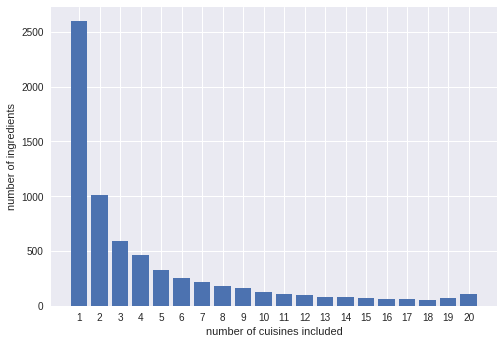

number of ingredients included in all cuisines: 107


In [0]:
# distribution about how many cuisines included at cuisine
# x: number of included cuisines
# y: number of ingredients

ingredient_cuisines_dict = dict()
for item in kaggle_train_data:
    ingredients = item['ingredients']
    cuisine = item['cuisine']
    for ingredi in ingredients:
        if ingredi in ingredient_cuisines_dict:
            ingredient_cuisines_dict[ingredi].add(cuisine)
        else:
            ingredient_cuisines_dict[ingredi] = {cuisine}
            
x_pos = range(len(unique_cuisines))
y = [0] * len(unique_cuisines)
for ingredi in ingredient_cuisines_dict:
    num_cuisines_per_ingredi = len(ingredient_cuisines_dict[ingredi])
    y[num_cuisines_per_ingredi-1] += 1

x = range(1, len(unique_cuisines)+1)
plt.bar(x_pos, y)
plt.xlabel('number of cuisines included')
plt.ylabel('number of ingredients')
plt.xticks(x_pos, x)
plt.show()

print('number of ingredients included in all cuisines:', y[-1])

In [0]:
# there are so many similar formed ingredients
temp_lst = []
for ingredi in unique_ingredients:
    if 'chicken' in ingredi:
        temp_lst.append(ingredi)
        print(ingredi)
        
print(temp_lst[:20])

chicken stock cubes
chicken egg
grilled chicken
boneless skinless chicken thigh fillets
chicken fillets
chicken broth low fat
italian chicken sausage
sodium free chicken broth
brown chicken stock
25% less sodium chicken broth
knorr tomato bouillon with chicken flavor cube
regular chicken broth
free-range chickens
chicken drumsticks
frozen popcorn chicken
knorr chicken flavor bouillon
gluten free chicken broth
bone in skin on chicken thigh
free range chicken breasts
homemade chicken broth
cut up cooked chicken
canned low sodium chicken broth
bone-in chicken
whole chicken
low fat low sodium chicken broth
nonfat chicken broth
chicken bouillon granules
chicken bones
no salt added chicken broth
sodium reduced chicken broth
organic low sodium chicken broth
2 1/2 to 3 lb. chicken, cut into serving pieces
smoked chicken sausages
knorr reduc sodium chicken flavor bouillon
boneless skinless chicken
skin on bone in chicken legs
popcorn chicken
instant chicken bouillon
low salt chicken broth
bone-

number of stems: 3211


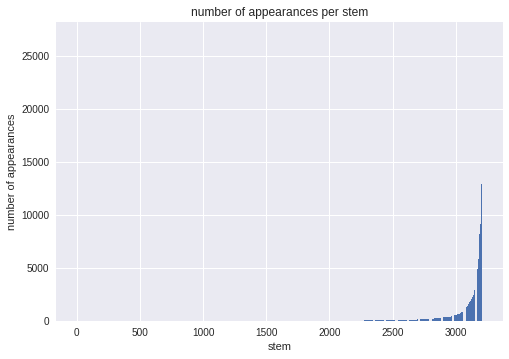

In [0]:
# we need work stemming
!pip3 install stemming
from stemming.porter2 import stem


def get_stems(ingredi):
    stems = []
    for word in ingredi.split(' '):
        if word:
            temp_stem = stem(word)
            stems.append(temp_stem)
            
    return stems
            
stem_freq_dict = dict()
for item in kaggle_train_data:
    ingredients = item['ingredients']
    for ingredi in ingredients:
        stems = get_stems(ingredi)

        for s in stems:
            if s in stem_freq_dict:
                stem_freq_dict[s] += 1
            else:
                stem_freq_dict[s] = 1

stem_freq_list = []
for s in stem_freq_dict:
    stem_freq_list.append((s, stem_freq_dict[s]))
    
stem_freq_list.sort(key=lambda x: x[1])
x = [item[0] for item in stem_freq_list] # stem
y = [item[1] for item in stem_freq_list] # number of appearances

print('number of stems:', len(x))

x_pos = range(len(x))
plt.bar(x_pos, y)
plt.xlabel('stem')
plt.ylabel('number of appearances')
plt.title('number of appearances per stem')
plt.show()


In [0]:
print(y[1500])

6


In [0]:
# print after stemming
temp_lst = []
count = 0
for ingredi in unique_ingredients:
    if 'chicken' in ingredi:
        stems = get_stems(ingredi)
        print(ingredi, stems)
        count += 1
        if count == 30:
            break


chicken stock cubes ['chicken', 'stock', 'cube']
chicken egg ['chicken', 'egg']
grilled chicken ['grill', 'chicken']
boneless skinless chicken thigh fillets ['boneless', 'skinless', 'chicken', 'thigh', 'fillet']
chicken fillets ['chicken', 'fillet']
chicken broth low fat ['chicken', 'broth', 'low', 'fat']
italian chicken sausage ['italian', 'chicken', 'sausag']
sodium free chicken broth ['sodium', 'free', 'chicken', 'broth']
brown chicken stock ['brown', 'chicken', 'stock']
25% less sodium chicken broth ['25%', 'less', 'sodium', 'chicken', 'broth']
knorr tomato bouillon with chicken flavor cube ['knorr', 'tomato', 'bouillon', 'with', 'chicken', 'flavor', 'cube']
regular chicken broth ['regular', 'chicken', 'broth']
free-range chickens ['free-rang', 'chicken']
chicken drumsticks ['chicken', 'drumstick']
frozen popcorn chicken ['frozen', 'popcorn', 'chicken']
knorr chicken flavor bouillon ['knorr', 'chicken', 'flavor', 'bouillon']
gluten free chicken broth ['gluten', 'free', 'chicken', '

In [0]:
# divide train, valid, test
def divide_dataset(data):
    shuffled = random.sample(data, len(data))
    train_rate = 0.75
    valid_rate = 0.05
    test_rate = 0.2
    assert(train_rate + valid_rate + test_rate == 1)
    
    i1 = int(len(data) * train_rate)
    i2 = int(len(data) * (train_rate + valid_rate))
    return shuffled[:i1], shuffled[i1:i2], shuffled[i2:] # train, valid, test

train_set, valid_set, test_set = divide_dataset(kaggle_train_data)
print('number of data in train_set:', len(train_set))
print('number of data in valid_set:', len(valid_set))
print('number of data in test_set:', len(test_set))

number of data in train_set: 29830
number of data in valid_set: 1989
number of data in test_set: 7955


In [0]:
stem_reduction_factor = 0.0002
unique_stems = []

# extract stems only appear more than threshold
for idx, num_stem_appearances in enumerate(y):
    if num_stem_appearances > len(kaggle_train_data) * stem_reduction_factor:
        unique_stems.append(x[idx])
        
print('number of unique stems:', len(unique_stems))

number of unique stems: 1543


In [0]:
# gpu config
import os
import tensorflow as tf

conf = tf.ConfigProto()
conf.gpu_options.per_process_gpu_memory_fraction = 1
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [0]:
# make inputs ans label from data set
import numpy as np

def make_input_and_label(dataset, is_label=True):
    stem_index_dict = dict()
    for index, stem in enumerate(unique_stems):
        stem_index_dict[stem] = index
        
    cuisine_index_dict = dict()
    for index, cuisi in enumerate(unique_cuisines):
        cuisine_index_dict[cuisi] = index
    
    # input -> 1d ingredients array
    # labels -> one-hotted
    inputs = np.zeros((len(dataset), len(unique_stems)), dtype=np.float32)
    one_hotted_label = np.zeros((len(dataset), num_cuisines), dtype=np.float32)

    # when labels of trainset
    if is_label:
        for idx, item in enumerate(dataset):
            ingredients = item['ingredients']
            for ingredi in ingredients:
                stems = get_stems(ingredi)
                for s in stems:
                    if s in stem_index_dict:
                        inputs[idx, stem_index_dict[s]] = 1
                
            cuisine = item['cuisine']
            one_hotted_label[idx, cuisine_index_dict[cuisine]] = 1
            
    # when testset
    else:
        for idx, item in enumerate(dataset):
            ingredients = item['ingredients']
            for ingredi in ingredients:
                stems = get_stems(ingredi)
                for s in stems:
                    if s in stem_index_dict:
                        inputs[idx, stem_index_dict[s]] = 1
            
    return inputs, one_hotted_label

train_dataset, train_labels = make_input_and_label(train_set)
valid_dataset, valid_labels = make_input_and_label(valid_set)
test_dataset, test_labels = make_input_and_label(test_set)

print('original data and # of ingredients: ', len(train_set[0]['ingredients']))
print(train_set[0], '\n')
print('converted inputs example')
print(train_dataset[0])
print('len: ', len(train_dataset[0]), 'and # of 1: ', int(sum(train_dataset[0])))
print('converted labels example')
print(train_labels[0])

original data and # of ingredients:  16
{'id': 26022, 'cuisine': 'vietnamese', 'ingredients': ['red leaf lettuce', 'thai basil', 'boneless skinless chicken breasts', 'white sugar', 'fish sauce', 'fresh cilantro', 'lemon grass', 'peanut oil', 'seedless cucumber', 'ground peanut', 'jalapeno chilies', 'fresh mint', 'lime juice', 'fresh ginger root', 'sesame oil', 'rice paper']} 

converted inputs example
[0. 0. 0. ... 1. 0. 0.]
len:  1543 and # of 1:  32
converted labels example
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# make model
class my_model:
    def __init__(self):
        self.inputs = tf.placeholder(tf.float32, [None, len(unique_stems)])
        self.labels = tf.placeholder(tf.float32, [None, num_cuisines])
        self.keep_probs = tf.placeholder(tf.float32, [len(nn_hdims)]) # dropout
        self.phase = tf.placeholder(tf.bool) # batch normalization
        
        # variables
        he_init = tf.initializers.he_normal()
        self.w1 = tf.Variable(he_init([len(unique_stems), nn_hdims[0]]))
        self.b1 = tf.constant(0.01, shape=[nn_hdims[0]])
        self.w2 = tf.Variable(he_init([nn_hdims[0], nn_hdims[1]]))
        self.b2 = tf.constant(0.01, shape=[nn_hdims[1]])
        self.w4 = tf.Variable(he_init([nn_hdims[-1], num_cuisines]))
        self.b4 = tf.constant(0.01, shape=[num_cuisines])
        
        # layers
        self.a1 = tf.matmul(self.inputs, self.w1) + self.b1
        self.a1 = tf.nn.leaky_relu(self.a1)
        self.a1 = tf.nn.dropout(self.a1, self.keep_probs[0])
        
        self.a2 = tf.matmul(self.a1, self.w2) + self.b2
        self.a2 = tf.nn.leaky_relu(self.a2)
        self.a2 = tf.nn.dropout(self.a2, self.keep_probs[1])
        
        self.logits = tf.matmul(self.a2, self.w4) + self.b4
        
        # loss
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.labels))
        reg = (tf.nn.l2_loss(self.w1) + tf.nn.l2_loss(self.w2) + tf.nn.l2_loss(self.w4)) * l2_factor
        self.loss = loss + reg
        
        # optimizer
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)
        
        # prediction and accuracy
        self.prediction = tf.nn.softmax(self.logits)
        correct_prediction = tf.equal(tf.argmax(self.prediction, axis=1), tf.argmax(self.labels, axis=1))
        self.correct = tf.reduce_sum(tf.cast(correct_prediction, dtype=tf.int32))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [0]:
# helper function for training and testing
def run_model(nn_hdims, learning_rate=0.001, batch_size=200, epochs=1, is_test=False, retraining=False):
    tf.reset_default_graph()
    model = my_model()
    with tf.Session(config=conf) as sess:
        sess.run(tf.global_variables_initializer())

        # training ###############################################################
        # get random batch of inputs and labels
        def get_batch(inputs, labels, idx, off):
            
            assert(len(inputs) == len(labels))
            rand_idx = np.random.permutation(np.arange(len(inputs)))[:batch_size]
            return inputs[rand_idx], labels[rand_idx]

        
        saver = tf.train.Saver()

        if not is_test:
            max_vacc = 0
            if retraining:
                saver.restore(sess, "./my_model_final")
                feed_dict_valid = {
                        model.inputs: valid_dataset,
                        model.labels: valid_labels,
                        model.keep_probs: test_probs,
                        model.phase: False,
                    }
                max_vacc = sess.run(model.accuracy, feed_dict=feed_dict_valid)
                print('Current Max Accuracy: %.4f' % (max_vacc))

            num_steps = int(len(train_dataset) * epochs)
            print('expect about %d steps' % (num_steps))
            correct = 0.0
            loss = 0.0
            #for step in tqdm.tqdm(range(0, num_steps, batch_size)):
            for step in range(0, num_steps, batch_size):
                #x_batch, y_batch = random_batch(train_dataset, train_labels)
                start = step % len(train_dataset)
                end = start + batch_size
                if  end >= len(train_dataset):
                    end = -1
                x_batch = train_dataset[start:end]
                y_batch = train_labels[start:end]
                
                feed_dict_train = {
                    model.inputs: x_batch,
                    model.labels: y_batch,
                    model.keep_probs: keep_probs,
                    model.phase: True,
                }

                _, temp_loss, temp_correct = sess.run([model.optimizer, model.loss, model.correct], feed_dict = feed_dict_train)
                correct += temp_correct
                loss += temp_loss

                if end == -1:
                    feed_dict_valid = {
                        model.inputs: valid_dataset,
                        model.labels: valid_labels,
                        model.keep_probs: test_probs,
                        model.phase: False,
                    }
                    valid_a = sess.run(model.accuracy, feed_dict=feed_dict_valid)
                    epoch = step // len(train_dataset)
                    acc = correct / len(train_dataset)
                    print('epoch %4d: train loss: %.3f, train accuracy: %.3f, valid accuracy: %.3f' % (epoch+1, loss, acc, valid_a))

                    if max_vacc < valid_a:
                        max_vacc = valid_a
                        saver.save(sess,"./my_model_final")
                        print('best accuracy!!')
                        
                    correct = 0
                    loss = 0

                #Save your final model

            #saver.save(sess, "./my_model_final")

        # training end ##########################################################

        else:
            # test performance ######################################################
            saver.restore(sess, "./my_model_final")

            feed_dict_test = {
                model.inputs: test_dataset,
                model.labels: test_labels,
                model.keep_probs: test_probs,
                model.phase: False,
            }
            test_l, test_a = sess.run([model.loss, model.accuracy], feed_dict=feed_dict_test)
            print('test loss: %.3f, test accuracy: %.3f' % (test_l, test_a))

In [0]:
nn_hdims = [512, 512]
learning_rate = 0.0005
batch_size = 128
epochs = 100
l2_factor = 0.001
keep_probs = [0.5, 0.5]
test_probs = [1, 1]

run_model(nn_hdims, learning_rate, batch_size, epochs, is_test=False, retraining=False)

expect about 2983000 steps
epoch    1: train loss: 531.124, train accuracy: 0.577, valid accuracy: 0.722
best accuracy!!
epoch    2: train loss: 355.830, train accuracy: 0.723, valid accuracy: 0.767
best accuracy!!
epoch    3: train loss: 307.422, train accuracy: 0.756, valid accuracy: 0.777
best accuracy!!
epoch    4: train loss: 277.942, train accuracy: 0.776, valid accuracy: 0.783
best accuracy!!
epoch    5: train loss: 257.742, train accuracy: 0.785, valid accuracy: 0.786
best accuracy!!
epoch    6: train loss: 243.729, train accuracy: 0.795, valid accuracy: 0.786
epoch    7: train loss: 234.300, train accuracy: 0.800, valid accuracy: 0.787
best accuracy!!
epoch    8: train loss: 224.245, train accuracy: 0.808, valid accuracy: 0.784
epoch    9: train loss: 217.368, train accuracy: 0.811, valid accuracy: 0.783
epoch   10: train loss: 214.402, train accuracy: 0.815, valid accuracy: 0.791
best accuracy!!
epoch   11: train loss: 209.678, train accuracy: 0.819, valid accuracy: 0.788
epo

In [0]:
run_model(nn_hdims, learning_rate, batch_size, epochs, is_test=True, retraining=False)

INFO:tensorflow:Restoring parameters from ./my_model_final
test loss: 1.062, test accuracy: 0.792


In [0]:
# predict format to submission on kaggle
final_data, final_label = make_input_and_label(kaggle_test_data, False)
tf.reset_default_graph()
model = my_model()
with tf.Session(config=conf) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, "./my_model_final")
    feed_dict_test = {
        model.inputs: final_data,
        model.labels: final_label,
        model.keep_probs: test_probs,
        model.phase: False,
    }
    
    logits = sess.run(model.logits, feed_dict=feed_dict_test)
    answers = np.argmax(logits, axis=1)
    
    print('kaggle_test_data:', len(kaggle_test_data))
    print('id,cuisine')
    for i, item in enumerate(kaggle_test_data):
        id = item['id']
        label = unique_cuisines[answers[i]]
        print('{},{}'.format(id, label))

INFO:tensorflow:Restoring parameters from ./my_model_final
kaggle_test_data: 9944
id,cuisine
18009,irish
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian
38527,southern_us
19666,italian
41217,chinese
28753,mexican
22659,british
21749,italian
44967,greek
42969,indian
44883,italian
20827,southern_us
23196,french
35387,mexican
33780,southern_us
19001,mexican
16526,southern_us
42455,japanese
47453,indian
42478,irish
11885,vietnamese
16585,italian
29639,southern_us
26245,vietnamese
38516,korean
47520,italian
26212,southern_us
23696,mexican
14926,thai
13292,irish
27346,japanese
1384,chinese
15959,mexican
42297,russian
46235,indian
21181,indian
9809,cajun_creole
22982,cajun_creole
23120,chinese
26743,french
12741,mexican
7050,italian
22437,italian
14760,spanish
10649,indian
48065,vietnamese
39931,chinese
32935,italian
40142,thai
19103,indian
38267,filipino
30512,italian
3324,chinese
26197,italian
384,japanese
47230,chinese
39748,cajun_creole
41038,french
24878,mexican
42624,fi